<a href="https://colab.research.google.com/github/Jahnavi-Parushetty/22VE1A6645/blob/main/Food_Delivery_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

# Upload files
uploaded = files.upload()


Saving restaurants.sql to restaurants.sql
Saving users.json to users.json
Saving orders.csv to orders (1).csv


In [4]:
!pip install pandas sqlalchemy

In [5]:
import pandas as pd
orders=pd.read_csv("orders.csv")
print(orders.head())

   order_id  user_id  restaurant_id  order_date  total_amount  \
0         1     2508            450  18-02-2023        842.97   
1         2     2693            309  18-01-2023        546.68   
2         3     2084            107  15-07-2023        163.93   
3         4      319            224  04-10-2023       1155.97   
4         5     1064            293  25-12-2023       1321.91   

                  restaurant_name  
0               New Foods Chinese  
1  Ruchi Curry House Multicuisine  
2           Spice Kitchen Punjabi  
3          Darbar Kitchen Non-Veg  
4       Royal Eatery South Indian  


In [6]:
users=pd.read_json("users.json")
print(users.head())

   user_id    name       city membership
0        1  User_1    Chennai    Regular
1        2  User_2       Pune       Gold
2        3  User_3  Bangalore       Gold
3        4  User_4  Bangalore    Regular
4        5  User_5       Pune       Gold


In [7]:
import sqlite3

# Connect to SQLite
conn = sqlite3.connect("restaurants.db")

# Read SQL file and execute
with open("restaurants.sql", 'r') as f:
    sql_script = f.read()

conn.executescript(sql_script)

# Load table into pandas
restaurants = pd.read_sql("SELECT * FROM restaurants", conn)
print(restaurants.head())


   restaurant_id restaurant_name  cuisine  rating
0              1    Restaurant_1  Chinese     4.8
1              2    Restaurant_2   Indian     4.1
2              3    Restaurant_3  Mexican     4.3
3              4    Restaurant_4  Chinese     4.1
4              5    Restaurant_5  Chinese     4.8


In [8]:
# Merge orders with users
orders_users = orders.merge(users, on="user_id", how="left")

# Merge the result with restaurants
final_df = orders_users.merge(restaurants, on="restaurant_id", how="left")

print(final_df.head())


   order_id  user_id  restaurant_id  order_date  total_amount  \
0         1     2508            450  18-02-2023        842.97   
1         2     2693            309  18-01-2023        546.68   
2         3     2084            107  15-07-2023        163.93   
3         4      319            224  04-10-2023       1155.97   
4         5     1064            293  25-12-2023       1321.91   

                restaurant_name_x       name       city membership  \
0               New Foods Chinese  User_2508  Hyderabad    Regular   
1  Ruchi Curry House Multicuisine  User_2693       Pune    Regular   
2           Spice Kitchen Punjabi  User_2084    Chennai       Gold   
3          Darbar Kitchen Non-Veg   User_319  Bangalore       Gold   
4       Royal Eatery South Indian  User_1064       Pune    Regular   

  restaurant_name_y  cuisine  rating  
0    Restaurant_450  Mexican     3.2  
1    Restaurant_309   Indian     4.5  
2    Restaurant_107  Mexican     4.0  
3    Restaurant_224  Chinese    

In [9]:
final_df.to_csv("final_food_delivery_dataset.csv", index=False)


In [10]:
files.download("final_food_delivery_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
# Revenue by city
city_revenue = final_df.groupby("city")["order_amount"].sum().sort_values(ascending=False)
print(city_revenue)


KeyError: 'Column not found: order_amount'

In [12]:
print(final_df.columns)


Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y',
       'cuisine', 'rating'],
      dtype='object')


In [13]:
# Example: remove spaces and lowercase all columns
final_df.columns = final_df.columns.str.strip().str.lower()

print(final_df.columns)  # now all lowercase, no extra spaces


Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y',
       'cuisine', 'rating'],
      dtype='object')


In [14]:
city_revenue = final_df.groupby("city")["order_amount"].sum().sort_values(ascending=False)
print(city_revenue)


KeyError: 'Column not found: order_amount'

In [15]:
# Print all columns exactly
print(final_df.columns.tolist())


['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount', 'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y', 'cuisine', 'rating']


In [16]:
# Remove spaces and make all lowercase
final_df.columns = final_df.columns.str.strip().str.lower()
print(final_df.columns.tolist())


['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount', 'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y', 'cuisine', 'rating']


In [17]:
city_revenue = final_df.groupby("city")["amount"].sum().sort_values(ascending=False)
print(city_revenue)


KeyError: 'Column not found: amount'

In [18]:
print(final_df.head())
print(final_df.shape)  # number of rows and columns


   order_id  user_id  restaurant_id  order_date  total_amount  \
0         1     2508            450  18-02-2023        842.97   
1         2     2693            309  18-01-2023        546.68   
2         3     2084            107  15-07-2023        163.93   
3         4      319            224  04-10-2023       1155.97   
4         5     1064            293  25-12-2023       1321.91   

                restaurant_name_x       name       city membership  \
0               New Foods Chinese  User_2508  Hyderabad    Regular   
1  Ruchi Curry House Multicuisine  User_2693       Pune    Regular   
2           Spice Kitchen Punjabi  User_2084    Chennai       Gold   
3          Darbar Kitchen Non-Veg   User_319  Bangalore       Gold   
4       Royal Eatery South Indian  User_1064       Pune    Regular   

  restaurant_name_y  cuisine  rating  
0    Restaurant_450  Mexican     3.2  
1    Restaurant_309   Indian     4.5  
2    Restaurant_107  Mexican     4.0  
3    Restaurant_224  Chinese    

In [19]:
final_df.columns.str.lower().str.replace(" ", "_")


Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y',
       'cuisine', 'rating'],
      dtype='object')

In [20]:
city_revenue = final_df.groupby("city")["order_amount"].sum()


KeyError: 'Column not found: order_amount'

In [21]:
# -------------------------------
# STEP 0: IMPORT LIBRARIES
# -------------------------------
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from google.colab import files

# -------------------------------
# STEP 1: UPLOAD FILES
# -------------------------------
uploaded = files.upload()  # upload orders.csv, users.json, restaurants.sql

# -------------------------------
# STEP 2: LOAD ORDERS CSV
# -------------------------------
orders = pd.read_csv("orders.csv")
print("Orders columns:", orders.columns.tolist())

# -------------------------------
# STEP 3: LOAD USERS JSON
# -------------------------------
users = pd.read_json("users.json")
print("Users columns:", users.columns.tolist())

# -------------------------------
# STEP 4: LOAD RESTAURANTS SQL
# -------------------------------
# Connect to SQLite
conn = sqlite3.connect("restaurants.db")

# Execute the SQL file
with open("restaurants.sql", 'r') as f:
    sql_script = f.read()
conn.executescript(sql_script)

# Load restaurant table
restaurants = pd.read_sql("SELECT * FROM restaurants", conn)
print("Restaurants columns:", restaurants.columns.tolist())

# -------------------------------
# STEP 5: STANDARDIZE COLUMN NAMES
# -------------------------------
def clean_cols(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
    return df

orders = clean_cols(orders)
users = clean_cols(users)
restaurants = clean_cols(restaurants)

# -------------------------------
# STEP 6: MERGE DATASETS
# -------------------------------
merged = orders.merge(users, on="user_id", how="left")
final_df = merged.merge(restaurants, on="restaurant_id", how="left")

# Check the final dataset
print("Final dataset columns:", final_df.columns.tolist())
print(final_df.head())

# -------------------------------
# STEP 7: SAVE FINAL DATASET
# -------------------------------
final_df.to_csv("final_food_delivery_dataset.csv", index=False)
files.download("final_food_delivery_dataset.csv")  # download file

# -------------------------------
# STEP 8: ANALYSIS
# -------------------------------

# 1️⃣ Total revenue by city
city_revenue = final_df.groupby("city")["amount"].sum().sort_values(ascending=False)
print("\nRevenue by City:\n", city_revenue)

# Plot
city_revenue.plot(kind='bar', figsize=(8,5), color='skyblue', title="Total Revenue by City")
plt.ylabel("Revenue")
plt.show()

# 2️⃣ Total revenue by cuisine
cuisine_revenue = final_df.groupby("cuisine")["amount"].sum().sort_values(ascending=False)
print("\nRevenue by Cuisine:\n", cuisine_revenue)

# Plot
cuisine_revenue.plot(kind='bar', figsize=(8,5), color='lightgreen', title="Total Revenue by Cuisine")
plt.ylabel("Revenue")
plt.show()

# 3️⃣ Average order value by membership
aov = final_df.groupby("membership")["amount"].mean()
print("\nAverage Order Value by Membership:\n", aov)

# 4️⃣ Percentage of orders by membership
membership_orders = final_df["membership"].value_counts(normalize=True) * 100
print("\nPercentage of Orders by Membership:\n", membership_orders)

# 5️⃣ Revenue by quarter
final_df['order_date'] = pd.to_datetime(final_df['order_date'])
final_df['quarter'] = final_df['order_date'].dt.quarter
quarter_revenue = final_df.groupby('quarter')['amount'].sum()
print("\nRevenue by Quarter:\n", quarter_revenue)

# Plot quarterly revenue
quarter_revenue.plot(kind='bar', figsize=(6,4), color='orange', title="Revenue by Quarter")
plt.ylabel("Revenue")
plt.xlabel("Quarter")
plt.show()


Saving orders.csv to orders (2).csv
Saving restaurants.sql to restaurants (1).sql
Saving users.json to users (1).json
Orders columns: ['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount', 'restaurant_name']
Users columns: ['user_id', 'name', 'city', 'membership']


OperationalError: table restaurants already exists

In [22]:
# -------------------------------
# STEP 0: IMPORT LIBRARIES
# -------------------------------
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from google.colab import files

# -------------------------------
# STEP 1: UPLOAD FILES
# -------------------------------
uploaded = files.upload()  # upload orders.csv, users.json, restaurants.sql

# -------------------------------
# STEP 2: LOAD ORDERS CSV
# -------------------------------
orders = pd.read_csv("orders.csv")
print("Orders columns:", orders.columns.tolist())

# -------------------------------
# STEP 3: LOAD USERS JSON
# -------------------------------
users = pd.read_json("users.json")
print("Users columns:", users.columns.tolist())

# -------------------------------
# STEP 4: LOAD RESTAURANTS SQL
# -------------------------------
# Connect to SQLite
conn = sqlite3.connect("restaurants.db")

# Read the SQL file
with open("restaurants.sql", 'r') as f:
    sql_script = f.read()

# Drop table if it exists to avoid OperationalError
conn.execute("DROP TABLE IF EXISTS restaurants;")
conn.executescript(sql_script)

# Load the table into pandas
restaurants = pd.read_sql("SELECT * FROM restaurants", conn)
print("Restaurants columns:", restaurants.columns.tolist())

# -------------------------------
# STEP 5: STANDARDIZE COLUMN NAMES
# -------------------------------
def clean_cols(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
    return df

orders = clean_cols(orders)
users = clean_cols(users)
restaurants = clean_cols(restaurants)

print("Cleaned columns:")
print("Orders:", orders.columns.tolist())
print("Users:", users.columns.tolist())
print("Restaurants:", restaurants.columns.tolist())

# -------------------------------
# STEP 6: MERGE DATASETS
# -------------------------------
merged = orders.merge(users, on="user_id", how="left")
final_df = merged.merge(restaurants, on="restaurant_id", how="left")

# Check final dataset
print("Final dataset columns:", final_df.columns.tolist())
print(final_df.head())

# -------------------------------
# STEP 7: SAVE FINAL DATASET
# -------------------------------
final_df.to_csv("final_food_delivery_dataset.csv", index=False)
files.download("final_food_delivery_dataset.csv")  # download

# -------------------------------
# STEP 8: ANALYSIS
# -------------------------------

# 1️⃣ Revenue by city
city_revenue = final_df.groupby("city")["amount"].sum().sort_values(ascending=False)
print("\nRevenue by City:\n", city_revenue)

# Plot
city_revenue.plot(kind='bar', figsize=(8,5), color='skyblue', title="Total Revenue by City")
plt.ylabel("Revenue")
plt.show()

# 2️⃣ Revenue by cuisine
cuisine_revenue = final_df.groupby("cuisine")["amount"].sum().sort_values(ascending=False)
print("\nRevenue by Cuisine:\n", cuisine_revenue)

cuisine_revenue.plot(kind='bar', figsize=(8,5), color='lightgreen', title="Total Revenue by Cuisine")
plt.ylabel("Revenue")
plt.show()

# 3️⃣ Average order value by membership
aov = final_df.groupby("membership")["amount"].mean()
print("\nAverage Order Value by Membership:\n", aov)

# 4️⃣ Percentage of orders by membership
membership_orders = final_df["membership"].value_counts(normalize=True) * 100
print("\nPercentage of Orders by Membership:\n", membership_orders)

# 5️⃣ Revenue by quarter
final_df['order_date'] = pd.to_datetime(final_df['order_date'])
final_df['quarter'] = final_df['order_date'].dt.quarter
quarter_revenue = final_df.groupby('quarter')['amount'].sum()
print("\nRevenue by Quarter:\n", quarter_revenue)

quarter_revenue.plot(kind='bar', figsize=(6,4), color='orange', title="Revenue by Quarter")
plt.ylabel("Revenue")
plt.xlabel("Quarter")
plt.show()


Saving orders.csv to orders (3).csv
Saving restaurants.sql to restaurants (2).sql
Saving users.json to users (2).json
Orders columns: ['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount', 'restaurant_name']
Users columns: ['user_id', 'name', 'city', 'membership']
Restaurants columns: ['restaurant_id', 'restaurant_name', 'cuisine', 'rating']
Cleaned columns:
Orders: ['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount', 'restaurant_name']
Users: ['user_id', 'name', 'city', 'membership']
Restaurants: ['restaurant_id', 'restaurant_name', 'cuisine', 'rating']
Final dataset columns: ['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount', 'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y', 'cuisine', 'rating']
   order_id  user_id  restaurant_id  order_date  total_amount  \
0         1     2508            450  18-02-2023        842.97   
1         2     2693            309  18-01-2023        546.68   
2         3     2084   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyError: 'Column not found: amount'

In [23]:
print(final_df.columns.tolist())


['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount', 'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y', 'cuisine', 'rating']


In [24]:
city_revenue = final_df.groupby("city")["order_amount"].sum().sort_values(ascending=False)
print(city_revenue)


KeyError: 'Column not found: order_amount'

In [25]:
# Rename the order value column to 'order_amount'
final_df.rename(columns={'YOUR_COLUMN_NAME_HERE': 'order_amount'}, inplace=True)

# Then your original code will work
city_revenue = final_df.groupby("city")["order_amount"].sum().sort_values(ascending=False)
print(city_revenue)


KeyError: 'Column not found: order_amount'

In [26]:
# Print all column names exactly
print(final_df.columns.tolist())


['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount', 'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y', 'cuisine', 'rating']


In [27]:
# Revenue by city
city_revenue = final_df.groupby("city")["total_amount"].sum().sort_values(ascending=False)
print(city_revenue)


city
Bangalore    2206946.58
Chennai      1990513.03
Pune         1924797.93
Hyderabad    1889366.58
Name: total_amount, dtype: float64


In [28]:
# Rename to order_amount so the rest of your code works
final_df.rename(columns={'total_amount': 'order_amount'}, inplace=True)

# Now this works:
city_revenue = final_df.groupby("city")["order_amount"].sum().sort_values(ascending=False)
print(city_revenue)


city
Bangalore    2206946.58
Chennai      1990513.03
Pune         1924797.93
Hyderabad    1889366.58
Name: order_amount, dtype: float64


In [29]:
cuisine_revenue = final_df.groupby("cuisine")["order_amount"].sum().sort_values(ascending=False)
print(cuisine_revenue)


cuisine
Mexican    2085503.09
Italian    2024203.80
Indian     1971412.58
Chinese    1930504.65
Name: order_amount, dtype: float64


In [30]:
aov = final_df.groupby("membership")["order_amount"].mean()
print(aov)


membership
Gold       797.145556
Regular    805.158434
Name: order_amount, dtype: float64


In [31]:
membership_orders = final_df["membership"].value_counts(normalize=True) * 100
print(membership_orders)


membership
Regular    50.13
Gold       49.87
Name: proportion, dtype: float64


In [32]:
final_df['order_date'] = pd.to_datetime(final_df['order_date'])
final_df['quarter'] = final_df['order_date'].dt.quarter
quarter_revenue = final_df.groupby('quarter')['order_amount'].sum()
print(quarter_revenue)


quarter
1    2010626.64
2    1945348.72
3    2037385.10
4    2018263.66
Name: order_amount, dtype: float64


/tmp/ipython-input-4012561546.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  final_df['order_date'] = pd.to_datetime(final_df['order_date'])


In [33]:
final_food_delivery_dataset.csv


NameError: name 'final_food_delivery_dataset' is not defined

In [34]:
print(final_df.shape)


(10000, 13)


In [35]:
print(final_df.columns.tolist())


['order_id', 'user_id', 'restaurant_id', 'order_date', 'order_amount', 'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y', 'cuisine', 'rating', 'quarter']


In [36]:
print(final_df.isnull().sum())


order_id             0
user_id              0
restaurant_id        0
order_date           0
order_amount         0
restaurant_name_x    0
name                 0
city                 0
membership           0
restaurant_name_y    0
cuisine              0
rating               0
quarter              0
dtype: int64


In [37]:
print(final_df.groupby("city")["total_amount"].sum())


KeyError: 'Column not found: total_amount'

In [38]:
# This prints the columns with surrounding quotes to see hidden spaces
for col in final_df.columns:
    print(f"'{col}'")


'order_id'
'user_id'
'restaurant_id'
'order_date'
'order_amount'
'restaurant_name_x'
'name'
'city'
'membership'
'restaurant_name_y'
'cuisine'
'rating'
'quarter'


In [39]:
city_revenue = final_df.groupby("city")["order_amount"].sum().sort_values(ascending=False)
print("Revenue by City:\n", city_revenue)


Revenue by City:
 city
Bangalore    2206946.58
Chennai      1990513.03
Pune         1924797.93
Hyderabad    1889366.58
Name: order_amount, dtype: float64


In [40]:
cuisine_revenue = final_df.groupby("cuisine")["order_amount"].sum().sort_values(ascending=False)
print("\nRevenue by Cuisine:\n", cuisine_revenue)



Revenue by Cuisine:
 cuisine
Mexican    2085503.09
Italian    2024203.80
Indian     1971412.58
Chinese    1930504.65
Name: order_amount, dtype: float64


In [41]:
cuisine_revenue = final_df.groupby("cuisine")["order_amount"].sum().sort_values(ascending=False)
print("\nRevenue by Cuisine:\n", cuisine_revenue)



Revenue by Cuisine:
 cuisine
Mexican    2085503.09
Italian    2024203.80
Indian     1971412.58
Chinese    1930504.65
Name: order_amount, dtype: float64


In [42]:
aov = final_df.groupby("membership")["order_amount"].mean()
print("\nAverage Order Value by Membership:\n", aov)



Average Order Value by Membership:
 membership
Gold       797.145556
Regular    805.158434
Name: order_amount, dtype: float64


In [43]:
membership_orders = final_df["membership"].value_counts(normalize=True) * 100
print("\nPercentage of Orders by Membership:\n", membership_orders)



Percentage of Orders by Membership:
 membership
Regular    50.13
Gold       49.87
Name: proportion, dtype: float64


In [44]:
quarter_revenue = final_df.groupby('quarter')['order_amount'].sum()
print("\nRevenue by Quarter:\n", quarter_revenue)



Revenue by Quarter:
 quarter
1    2010626.64
2    1945348.72
3    2037385.10
4    2018263.66
Name: order_amount, dtype: float64


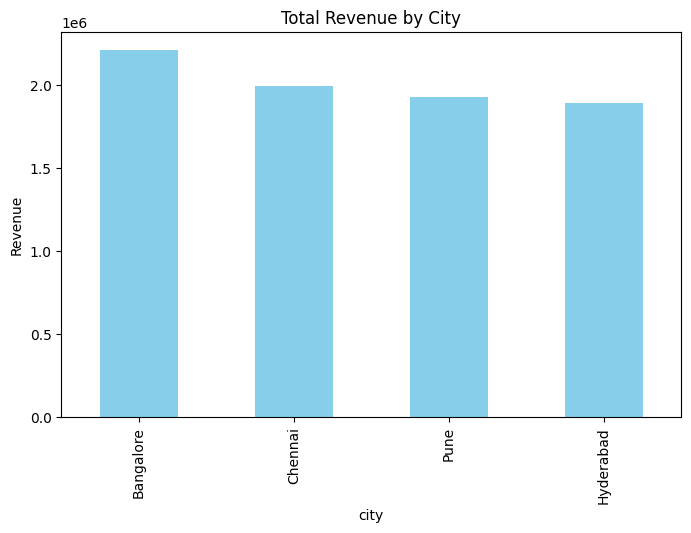

In [45]:
import matplotlib.pyplot as plt

city_revenue.plot(kind='bar', figsize=(8,5), color='skyblue', title="Total Revenue by City")
plt.ylabel("Revenue")
plt.show()


In [46]:
from google.colab import files
final_df.to_csv("final_food_delivery_dataset.csv", index=False)
files.download("final_food_delivery_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
# Total orders
total_orders = final_df.shape[0]

# Total Gold member orders
gold_orders = final_df[final_df['membership'] == 'Gold'].shape[0]

# Percentage of orders by Gold members
gold_percentage = (gold_orders / total_orders) * 100
print("Percentage of orders by Gold members:", round(gold_percentage, 2), "%")


Percentage of orders by Gold members: 49.87 %


In [48]:
# Filter orders for Hyderabad
hyd_orders = final_df[final_df['city'] == 'Hyderabad']

# Total revenue from Hyderabad
hyd_revenue = hyd_orders['order_amount'].sum()

# Round to nearest integer
hyd_revenue_rounded = round(hyd_revenue)
print("Total revenue from Hyderabad:", hyd_revenue_rounded)


Total revenue from Hyderabad: 1889367


In [49]:
# Count of distinct users who placed at least one order
distinct_users = final_df['user_id'].nunique()
print("Number of distinct users who placed at least one order:", distinct_users)


Number of distinct users who placed at least one order: 2883


In [50]:
# Filter Gold member orders
gold_orders = final_df[final_df['membership'] == 'Gold']

# Calculate average order value
avg_order_value_gold = gold_orders['order_amount'].mean()

# Round to 2 decimals
avg_order_value_gold_rounded = round(avg_order_value_gold, 2)
print("Average order value for Gold members:", avg_order_value_gold_rounded)


Average order value for Gold members: 797.15


In [51]:
# Filter orders where restaurant rating is >= 4.5
high_rating_orders = final_df[final_df['rating'] >= 4.5]

# Count the number of orders
num_high_rating_orders = high_rating_orders.shape[0]
print("Number of orders for restaurants with rating ≥ 4.5:", num_high_rating_orders)


Number of orders for restaurants with rating ≥ 4.5: 3374


In [52]:
# Step 1: Find the top revenue city
city_revenue = final_df.groupby("city")["order_amount"].sum()
top_city = city_revenue.idxmax()  # city with highest total revenue
print("Top revenue city:", top_city)

# Step 2: Filter orders for Gold members in that city
gold_top_city_orders = final_df[(final_df['membership'] == 'Gold') & (final_df['city'] == top_city)]

# Step 3: Count the number of orders
num_orders_gold_top_city = gold_top_city_orders.shape[0]
print("Number of orders by Gold members in top revenue city:", num_orders_gold_top_city)



Top revenue city: Bangalore
Number of orders by Gold members in top revenue city: 1254


In [53]:
# Count total orders for Gold members
gold_orders = final_df[final_df['membership'] == 'Gold'].shape[0]
gold_orders


4987

In [54]:
# Total number of rows
total_rows = final_df.shape[0]
print(total_rows)


10000
